In [1]:
%load_ext autoreload
%autoreload 2
%cd ../..

/home/dmytro/Desktop/counterfactual-search


In [2]:
from pathlib import Path


root_dir = Path('./data/totalsegmentor')
print(list(root_dir.glob('*')))
train_dir = root_dir / 'train'
test_dir = root_dir / 'test'

nn_dir = root_dir / 'nnUNet_predictions'
print(list(test_dir.glob('*')))

[PosixPath('data/totalsegmentor/train'), PosixPath('data/totalsegmentor/nnUNet_predictions'), PosixPath('data/totalsegmentor/test')]
[PosixPath('data/totalsegmentor/test/cyst'), PosixPath('data/totalsegmentor/test/control'), PosixPath('data/totalsegmentor/test/tumor')]


In [3]:
list(test_dir.glob('**/*'))

[PosixPath('data/totalsegmentor/test/cyst'),
 PosixPath('data/totalsegmentor/test/control'),
 PosixPath('data/totalsegmentor/test/tumor'),
 PosixPath('data/totalsegmentor/test/cyst/s1404.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0885.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0536.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0320.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0617.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0590.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0749.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s1383.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s1347.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0029.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0583.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s1361.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0723.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0644.nii.gz'),
 PosixPath('data/totalsegmentor/test/cyst/s0098.n

In [4]:
# data/totalsegmentor/test/control/s0703.nii.gz
import nibabel as nib

ct_scan = nib.load('data/totalsegmentor/test/control/s0703.nii.gz')  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()  # to just work with numpy array use get_fdata() method

In [5]:
# data/totalsegmentor/test/control/s0703.nii.gz
import nibabel as nib


train_paths = {p.name: list(p.glob('*.gz')) for p in train_dir.glob('*') if p.is_dir()}
print('train', {k: len(v) for k, v in train_paths.items()})

test_paths = {p.name: list(p.glob('*.gz')) for p in test_dir.glob('*') if p.is_dir()}
print('val', {k: len(v) for k, v in test_paths.items()})

print('total in split', sum(map(len, train_paths.values())) + sum(map(len, test_paths.values())))


nn_paths = list(nn_dir.glob('*.gz'))
print('nn preds', len(nn_paths))

train {'cyst': 104, 'control': 136, 'tumor': 102}
val {'cyst': 26, 'control': 34, 'tumor': 26}
total in split 428
nn preds 496


In [6]:
import pickle


plans = pickle.load((nn_dir / 'plans.pkl').open('rb'))
print(list(plans.keys()))

['num_stages', 'num_modalities', 'modalities', 'normalization_schemes', 'dataset_properties', 'list_of_npz_files', 'original_spacings', 'original_sizes', 'preprocessed_data_folder', 'num_classes', 'all_classes', 'base_num_features', 'use_mask_for_norm', 'keep_only_largest_region', 'min_region_size_per_class', 'min_size_per_class', 'transpose_forward', 'transpose_backward', 'data_identifier', 'plans_per_stage', 'preprocessor_name', 'conv_per_stage']


In [7]:
plans['base_num_features']

32

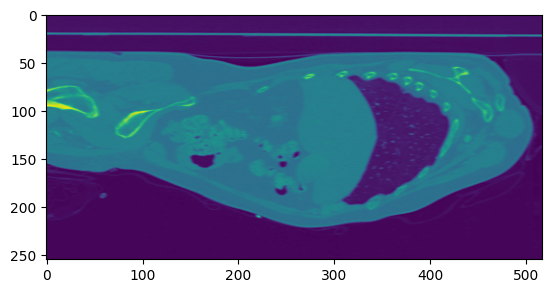

In [8]:
from matplotlib import pyplot as plt


ct_scan = nib.load(train_paths['cyst'][0])  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[200])

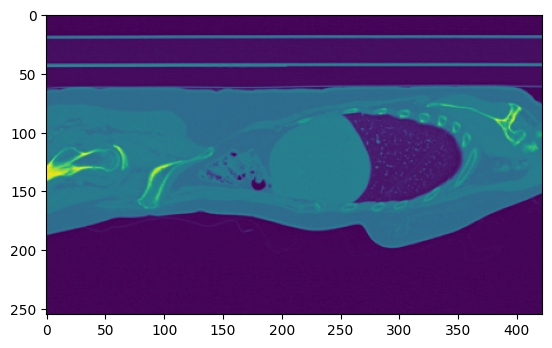

In [9]:
ct_scan = nib.load(train_paths['control'][0])  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[200])

In [10]:
dir(ct_scan)

['ImageArrayProxy',
 'ImageSlicer',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_affine',
 '_affine2header',
 '_compressed_suffixes',
 '_data_cache',
 '_dataobj',
 '_dtype_alias',
 '_fdata_cache',
 '_filemap_from_iobase',
 '_get_fileholders',
 '_header',
 '_load_cache',
 '_meta_sniff_len',
 '_sniff_meta_for',
 'affine',
 'as_reoriented',
 'dataobj',
 'extra',
 'file_map',
 'files_types',
 'filespec_to_file_map',
 'from_bytes',
 'from_file_map',
 'from_filename',
 'from_image',
 'from_stream',
 'from_url',
 'get_data',
 'get_data_dtype',
 'get_fdata',
 'get_filename',
 'get_qform',
 'get_sform',
 'header',
 'header_class',
 'in_m

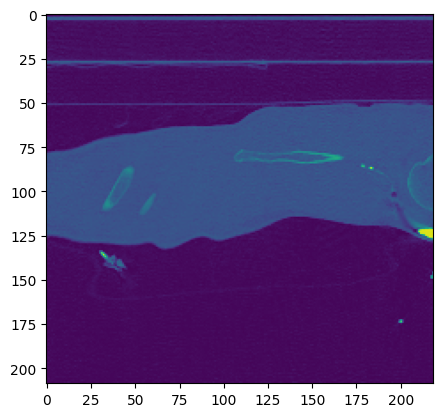

In [11]:
ct_scan = nib.load(train_paths['tumor'][0])  # loads the file. this usually comes with lots of metadata
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[200])

In [12]:
!mkdir

mkdir: missing operand
Try 'mkdir --help' for more information.


In [175]:
import numpy as np


train_names = set(p.name for lst in train_paths.values() for p in lst)
test_names = set(p.name for lst in test_paths.values() for p in lst)

for path in nn_paths:
    ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata

    #     is_train = path.name in train_names
    if path.name in train_names:
        split = 'train'
        class_name = next(train_dir.glob(f'**/{path.name}')).parent.name
    elif path.name in test_names:
        split = 'test'
        class_name = next(test_dir.glob(f'**/{path.name}')).parent.name
    else:
        split = 'unknown'
        class_name = 'unknown'

    #     if len(np.unique(numpy_volume)) > 3:
    #         break

    numpy_volume = ct_scan.get_fdata()
    if split == 'unknown':
        print(split, class_name, path.name, np.unique(numpy_volume))
#     plt.imshow(numpy_volume[200])

unknown unknown s0322.nii.gz [0.]
unknown unknown s0953.nii.gz [0.]
unknown unknown s0336.nii.gz [0.]
unknown unknown s0249.nii.gz [0.]
unknown unknown s0840.nii.gz [0.]
unknown unknown s0376.nii.gz [0.]
unknown unknown s0791.nii.gz [0.]
unknown unknown s0688.nii.gz [0.]
unknown unknown s1244.nii.gz [0. 2.]
unknown unknown s0128.nii.gz [0.]
unknown unknown s1026.nii.gz [0.]
unknown unknown s1275.nii.gz [0.]
unknown unknown s0545.nii.gz [0. 2.]
unknown unknown s0022.nii.gz [0. 2. 3.]
unknown unknown s0421.nii.gz [0.]
unknown unknown s1283.nii.gz [0.]
unknown unknown s0162.nii.gz [0.]
unknown unknown s0824.nii.gz [0.]
unknown unknown s0347.nii.gz [0.]
unknown unknown s0595.nii.gz [0.]
unknown unknown s1182.nii.gz [0.]
unknown unknown s0580.nii.gz [0.]
unknown unknown s0675.nii.gz [0.]
unknown unknown s1178.nii.gz [0. 2.]
unknown unknown s0608.nii.gz [0.]
unknown unknown s1168.nii.gz [0.]
unknown unknown s0736.nii.gz [0.]
unknown unknown s1025.nii.gz [0.]
unknown unknown s0821.nii.gz [0.]

In [14]:
path.name, path.parent

('s0322.nii.gz', PosixPath('data/totalsegmentor/nnUNet_predictions'))

In [15]:
from shutil import copy2


tumor_name = 's0420.nii.gz'
scan_path = next(train_dir.glob(f'**/{tumor_name}'))

path = nn_dir / tumor_name

print(scan_path)

copy2(path, Path('./data/tsm-vis/') / f'nnunet_{scan_path.name}')
copy2(scan_path, Path('./data/tsm-vis/', scan_path.name))

data/totalsegmentor/train/tumor/s0420.nii.gz


PosixPath('data/tsm-vis/s0420.nii.gz')

In [16]:
ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata
mask_volume = ct_scan.get_fdata()

for i in range(0, mask_volume.shape[1], 5):
    print(i, np.unique(mask_volume[:, i]))

0 [0.]
5 [0.]
10 [0.]
15 [0.]
20 [0.]
25 [0.]
30 [0.]
35 [0.]
40 [0.]
45 [0.]
50 [0.]
55 [0.]
60 [0. 1.]
65 [0. 1. 2.]
70 [0. 1. 2.]
75 [0. 1.]
80 [0.]
85 [0.]
90 [0.]
95 [0.]
100 [0.]
105 [0.]
110 [0.]
115 [0.]
120 [0.]
125 [0.]
130 [0.]
135 [0.]
140 [0.]
145 [0.]
150 [0.]
155 [0.]
160 [0.]
165 [0.]
170 [0.]
175 [0.]
180 [0.]
185 [0.]
190 [0.]
195 [0.]
200 [0.]
205 [0.]


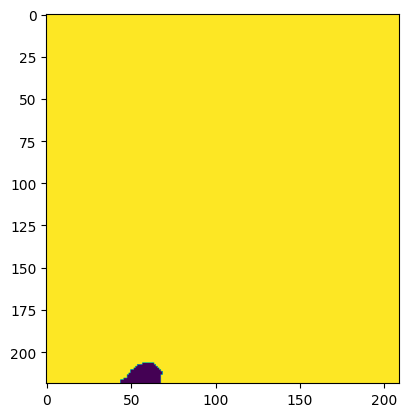

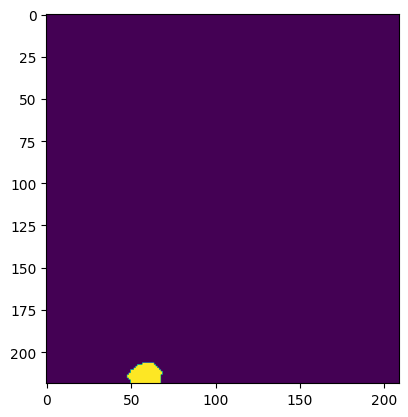

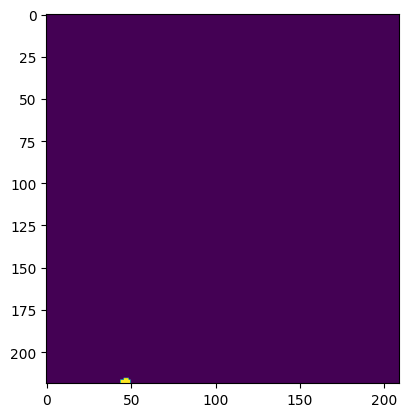

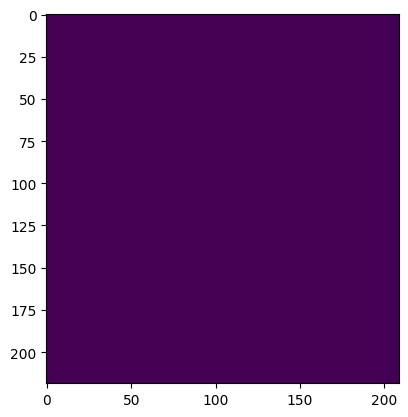

<Figure size 640x480 with 0 Axes>

In [17]:
ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata

numpy_volume = ct_scan.get_fdata()

for i in range(4):
    plt.imshow(numpy_volume[:, 65, ::-1].T == i)
    plt.figure()

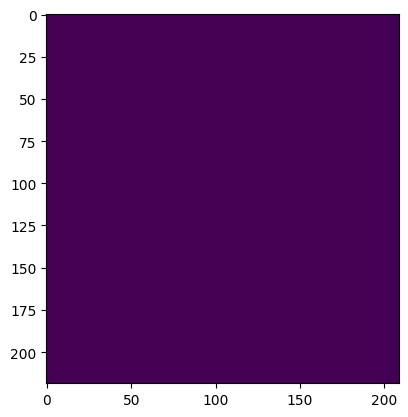

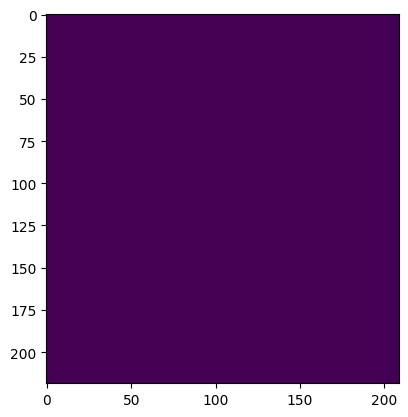

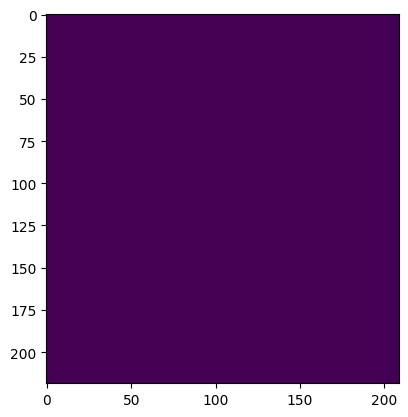

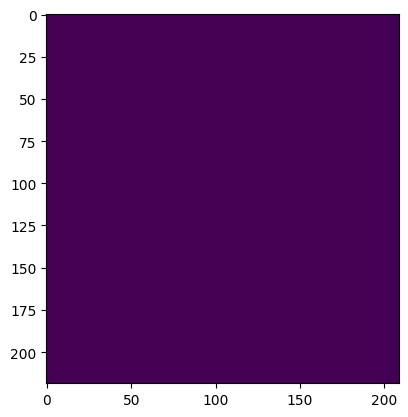

<Figure size 640x480 with 0 Axes>

In [18]:
ct_scan = nib.load(path)  # loads the file. this usually comes with lots of metadata

numpy_volume = ct_scan.get_fdata()

for i in range(4):
    plt.imshow(numpy_volume[:, 125, ::-1].T == i)
    plt.figure()

In [26]:
%timeit ct_scan = nib.load(scan_path) # loads the file. this usually comes with lots of metadata

%timeit numpy_volume = ct_scan.get_fdata()

337 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
295 ns ± 1.64 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


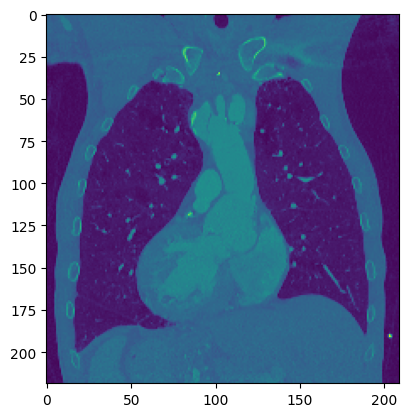

In [21]:
ct_scan = nib.load(scan_path)  # loads the file. this usually comes with lots of metadata

numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[:, 130, ::-1].T)

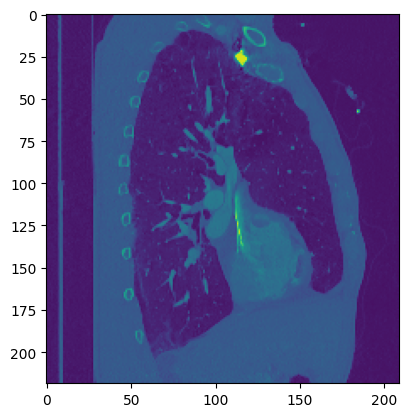

In [22]:
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[130, :, ::-1].T)

In [25]:
numpy_volume.shape

(209, 209, 219)

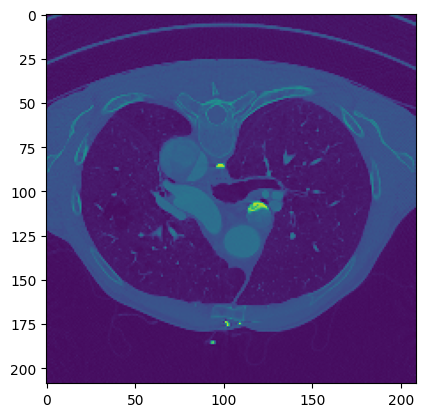

In [23]:
numpy_volume = ct_scan.get_fdata()
plt.imshow(numpy_volume[:, :, 130].T)

In [27]:
path

PosixPath('data/totalsegmentor/nnUNet_predictions/s0420.nii.gz')

In [81]:
!pip install memory_profiler

  Using cached memory_profiler-0.61.0-py3-none-any.whl (31 kB)


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
0.4589225 0.2255861
(256, 256) -1.995605 2.3985407


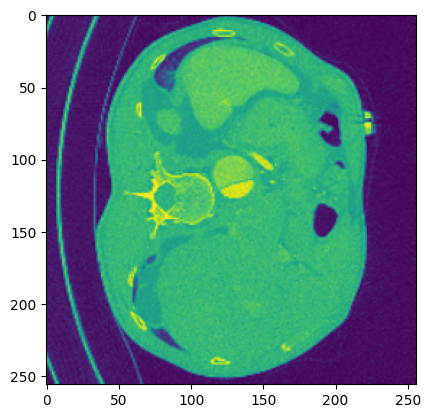

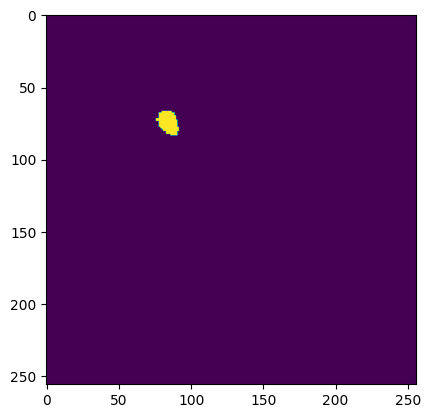

In [170]:
import torch
import numpy as np
import albumentations as albu
import nibabel as nib
from numpy.lib.format import open_memmap
import cv2

%load_ext memory_profiler

slicing_dims = {'sagittal': 0, 'coronal': 1, 'axial': 2}  # side view  # front view  # top down view


class CTScan(torch.utils.data.Dataset):
    def __init__(
        self,
        scan_path: Path,
        labels_path: Path,
        transforms: albu.Compose = None,
        min_max_normalization: bool = True,
        slicing_direction: str = 'axial',
        classes: list[str] = ('empty', 'kidney'),
        sampling_class: str = 'kidney',
    ):
        super().__init__()
        self.min_max_norm = min_max_normalization
        self.transforms = transforms
        self.slicing_dim = slicing_dims[slicing_direction]

        self.scan = self.load_volume(scan_path)
        self.labels = self.load_volume(labels_path)

        assert self.scan.shape == self.labels.shape, 'Shapes of provided scan and labels volumes do not match'

        self.sampling_class = sampling_class
        self.classes = classes  # TODO: check out if nnUnet has tumor label as 2 or 3
        self.class_to_idx = {c: i for i, c in enumerate(self.classes)}

    def load_volume(self, scan_path: Path) -> np.ndarray:
        mmap_path = scan_path.with_name(scan_path.stem + '.npy')
        if path.suffix == '.gz' and not mmap_path.exists():
            ct_scan = nib.load(scan_path)  # loads the file. this usually comes with lots of metadata
            vol = ct_scan.get_fdata()
            vol_mmap = open_memmap(mmap_path, 'w+', vol.dtype, shape=vol.shape)
            vol_mmap[:] = vol[:]
            #             print(f'Created memory mapped object for: {scan_path}')
            return vol_mmap
        #         print(f'Loaded memory mapped object from: {mmap_path}')
        return np.load(mmap_path, mmap_mode='r')

    def get_sampling_labels(self):
        class_id = self.class_to_idx[self.sampling_class]
        dims = tuple(i for i in range(len(self.scan.shape)) if i != self.slicing_dim)
        return (self.labels == class_id).any(axis=dims).astype(np.uint8)

    def _get_slicer(self, index: int) -> np.ndarray:
        if self.slicing_dim == 0:
            return np.s_[index]
        elif self.slicing_dim == 1:
            return np.s_[:, index]
        elif self.slicing_dim == 2:
            return np.s_[:, :, index]
        else:
            raise RuntimeError(f'Unable to slice dimension: {self.slicing_dim}')

    def get_ith_slice(self, volume: np.ndarray, index: int) -> np.ndarray:
        return volume[self._get_slicer(index)]

    def __len__(self):
        return self.scan.shape[self.slicing_dim]

    def __getitem__(self, index):
        scan_slice = self.get_ith_slice(self.scan, index)
        label_slice = self.get_ith_slice(self.labels, index)

        clip_range = np.percentile(scan_slice, q=0.05), np.percentile(scan_slice, q=99.5)
        scan_slice = np.clip(scan_slice, *clip_range)  # normalization

        # normalize image
        smin, smax = scan_slice.min(), scan_slice.max()
        #         print(smin, smax)
        if self.min_max_norm:
            scan_slice = (scan_slice - smin) / (smax - smin)
        else:
            scan_slice = (scan_slice - scan_slice.mean()) / scan_slice.std()
        #         print(scan_slice.min(), scan_slice.max())

        # prepare masks
        if len(self.classes) == 2:
            # binary setting
            masks = [(label_slice == self.class_to_idx[self.classes[-1]]).astype(np.uint8)]
        else:
            # multiclass/multilabel setting
            return NotImplemented
            masks = [(label_slice == self.class_to_idx[cname]).astype(np.uint8) for cname in self.classes]

        sample = {'image': scan_slice, 'masks': masks}
        if self.transforms:
            sample = self.transforms(**sample)
        #         x = torch.from_numpy(norm_x)
        #         y = torch.LongTensor(self.labels[index])

        #         y_onehot = nn.functional.one_hot(y, num_classes=len(self.classes) - 1)
        #         y_onehot = y_onehot.sum(dim=0).float()

        return sample


imagenet_mean = 0.485, 0.456, 0.406
imagenet_std = 0.229, 0.224, 0.225
grayscale_coefs = 0.2989, 0.587, 0.114

grayscale_mean = sum(m * c for m, c in zip(imagenet_mean, grayscale_coefs))
grayscale_std = sum(m * c for m, c in zip(imagenet_std, grayscale_coefs))
# grayscale, mean_nums, std_nums
print(grayscale_mean, grayscale_std)

mean, std = grayscale_mean, grayscale_std

data_transforms = {
    "train": albu.Compose(
        [
            albu.HorizontalFlip(p=0.5),
            albu.VerticalFlip(p=0.1),
            albu.ShiftScaleRotate(scale_limit=0.1, rotate_limit=10, shift_limit=0.07, p=0.5, border_mode=cv2.BORDER_CONSTANT, value=0),
            albu.Resize(256, 256, cv2.INTER_LINEAR),
            # image is expected in [0; 1] range already before normalization
            albu.Normalize(mean, std, max_pixel_value=1.0),
        ]
    ),
    "val": albu.Compose(
        [
            albu.Resize(256, 256, cv2.INTER_LINEAR),
            # image is expected in [0; 1] range already before normalization
            albu.Normalize(mean, std, max_pixel_value=1.0),
        ]
    ),
}

scan = CTScan(scan_path, nn_dir / path.name, transforms=data_transforms['val'])
# print(scan.get_sampling_labels())
sample = scan[10]

print(sample['image'].shape, sample['image'].min(), sample['image'].max())

plt.imshow(sample['image'])
plt.figure()
plt.imshow(sample['masks'][0])

In [8]:
import numpy as np

np.unique(np.load('data/totalsegmentor/train/tumor/s0014.nii.npy', mmap_mode='r'))

array([-1298., -1296., -1277., ...,  2582.,  2658.,  2663.])

In [171]:
scan.scan.shape

(209, 209, 219)

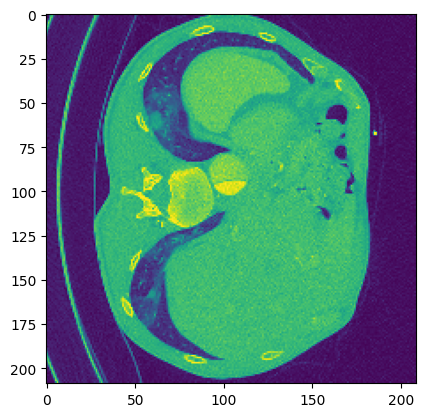

AxisError: axis 209 is out of bounds for array of dimension 3

In [ ]:
img_

In [76]:
scan.scan.shape

(209, 209, 219)

In [77]:
len(scan)

219